## Netflix Catalog Analysis

Author: Andy Garza
Contact: GitHub • LinkedIn

Summary:
I explore the public Netflix dataset to understand the distribution of titles by type and year, the actors/actresses with the most appearances, and trends in content additions. I present key findings with clear visualizations and a brief narrative.

## Table of Contents {#table-of-contents}
1. [Introduction and Context](#introduction-and-context)  
2. [Objectives](#objectives)  
3. [Data Loading and Exploration](#data-loading-and-exploration)  
4. [Data Cleaning](#data-cleaning)  
5. [Analysis and Visualizations](#analysis-and-visualizations)  
6. [Conclusions](#conclusions)  
7. [Credits](#credits)

## Introduction and Context {#introduction-and-context}
This project analyzes a dataset of Netflix titles (movies and series), with fields such as title, type, country of production, date added, and cast, among others. The objective is to answer common business and content-related questions: What type of content dominates? Who are the most frequent performers? How has the addition of content evolved over time?

## Objectives {#objectives}
- Identify actors/actresses with the most appearances in the catalog.  
- Analyze trends by year of title addition.  
- Compare movies vs. series in volume and duration (if applicable).  
- Summarize actionable findings and opportunities for future analysis.  

## Data Loading and Exploration {#data-loading-and-exploration}
In this section, libraries are imported, the dataset is loaded, and its structure is reviewed using `head()`, `info()`, and `describe()`.  


## Data Cleaning {#data-cleaning}
- Standardization of columns (snake_case, without accents).  
- Type conversion (e.g., dates).  
- Handling of nulls and duplicates.  
- Normalization of composite fields (e.g., separating the cast).  


## Analysis and Visualizations {#analysis-and-visualizations}
Each subsection includes a brief explanation, the corresponding code, and an interpretation of the resulting chart.  


# 📘 Project: Netflix Data Analysis with Python and Pandas
**Dataset:** netflix.csv  


## ❓ Guiding Questions for Analysis (answer each one in new cells)  


1. What are the most common content types (movies vs. TV shows)?  
A: Movie 6131, TV Show 2676. Movies are the most common content type.  

2. How has the content addition evolved over the years?  
A: The chart shows that the amount of content added to Netflix increased significantly between 2015 and 2019, peaking in 2019 with more than 1,000 new titles. In 2020, there is a slight drop, probably influenced by the pandemic. In years prior to 2015, the volume was very low. This suggests that the catalog grew aggressively in recent years to compete in the streaming market.  

3. Which countries have the most content on Netflix?  
A: The countries with the highest production are the US, India, UK, Japan, South Korea, Canada, Spain, France, Mexico, and Egypt, with the US having by far the most.  

4. Who are the most frequent directors?  
A: The chart shows the Top 10 directors, and Rajiv Chilaka stands out with the most appearances, having 19 movies or TV shows.  

5. What is the average duration of movies vs. TV shows?  
A: Movies = 99.57 min, TV Shows = 1.7 seasons.  

6. How does content vary by category (drama, comedy, etc.)?  
A: There is a large amount of content in Movies, especially in the International genre, followed by drama and comedy.  

7. What content has the longest and shortest durations?  
A: Movies contain both the longest and shortest content.  

8. Which actors or actresses appear most frequently in the Netflix catalog?  
A: The top 5 actors are Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, and Takahiro Sakurai.  

9. How much content is there by language?  
A: —  top 4 Countries US, India, UK, Japan we can asume its 1. English, 2. Indian, 3. Japanese

10. What is the distribution of age ratings in the Netflix catalog?  
A: —  Top 3 TV-Ma, TV-14, TV-PG


In [1]:
# 📦 STEP 1: load and explore data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load CSV file into a DataFrame called df
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# First inspections with .head(), .info(), .describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [6]:
(df["type"].value_counts(normalize=True)*100).round(2)

type
Movie      69.62
TV Show    30.38
Name: proportion, dtype: float64

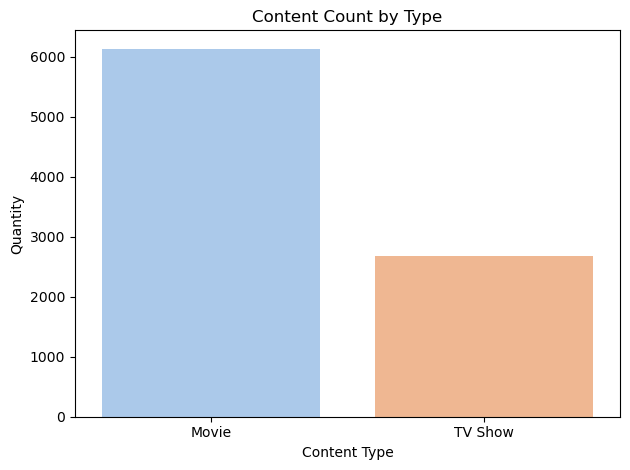

In [7]:
#1. What are the most common content types (movies vs. TV shows)?
sns.countplot(
    data=df,
    x="type",
    hue="type",
    palette="pastel",
    legend=False
)
plt.title("Content Count by Type")
plt.xlabel("Content Type")
plt.ylabel("Quantity")

plt.tight_layout()
plt.show()

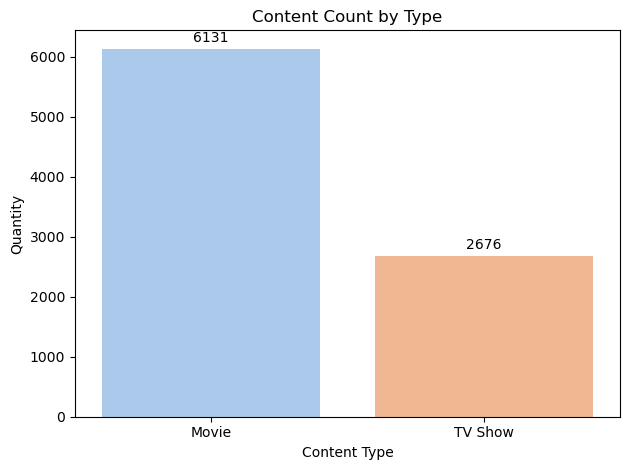

In [8]:
ax = sns.countplot(
    data=df,
    x="type",
    hue="type",
    palette="pastel",
)
#Add count above bar
for container in ax.containers:
    ax.bar_label(container,label_type="edge",padding=3)

plt.title("Content Count by Type")
plt.xlabel("Content Type")
plt.ylabel("Quantity")

plt.tight_layout()
plt.show()

In [9]:
# evolution of content added per year
# 1. Convert the 'date_added' column to date format

df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"])

In [11]:
#Extract the year
df["year_added"] = df["date_added"].dt.year
df["year_added"].value_counts()

year_added
2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

In [12]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


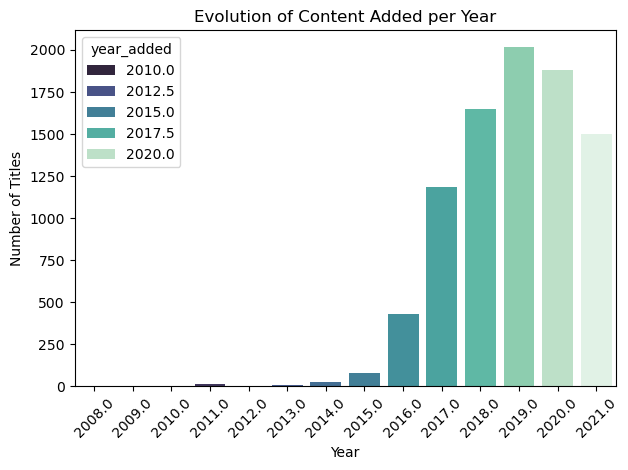

In [15]:
#2. How has the content addition evolved over the years?
year_count = (
    df["year_added"]
    .value_counts()
    .sort_index()
)

sns.barplot(
    x=year_count.index,
    y=year_count.values,
    palette="mako",
    hue=year_count.index
)

plt.title("Evolution of Content Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

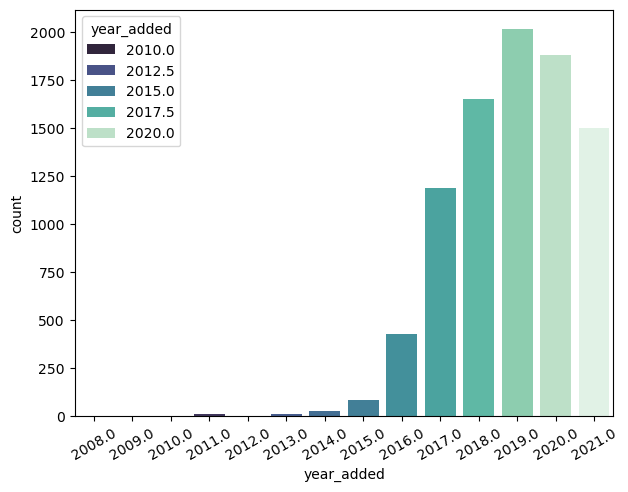

In [14]:
# 2. Count how many movies were added per year

sns.countplot(
    data=df,
    x="year_added",
    hue="year_added",
    palette="mako"
)
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

## 🧼 Step-by-Step Data Cleaning (one cell per action)

In [16]:
#3.Which countries have the most content on Netflix?
df["country"].value_counts().head()

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64

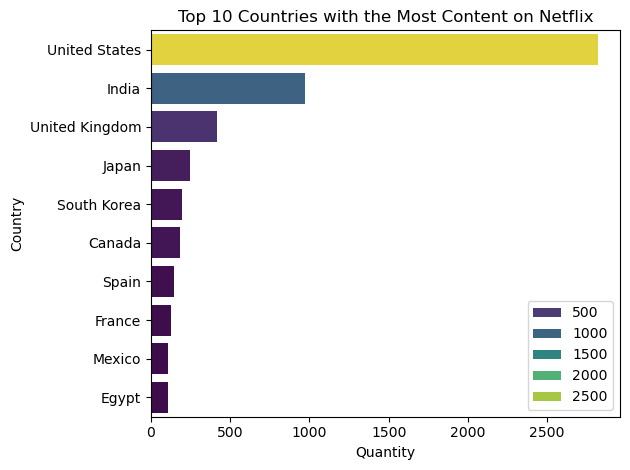

In [17]:
top_paises = (
    df["country"]
    .value_counts()
    .head(10)
)

sns.barplot(
    x=top_paises.values,
    y=top_paises.index,
    hue=top_paises.values,
    palette="viridis"
)
plt.title("Top 10 Countries with the Most Content on Netflix")
plt.xlabel("Quantity")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


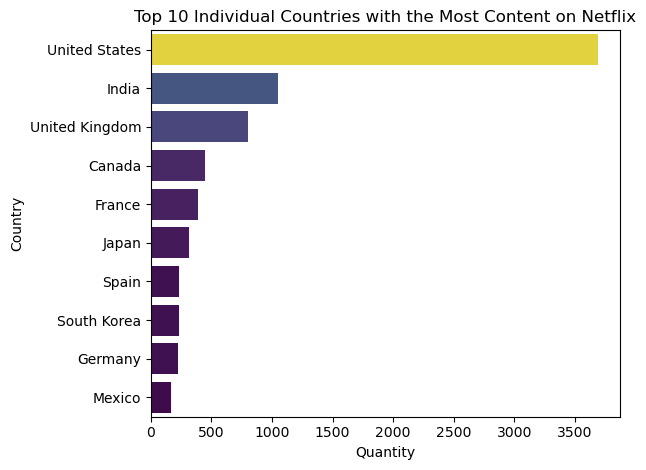

In [18]:
# 1. Remove null values in the 'country' column
df_country = df["country"].dropna()

# 2. Split multiple countries (by comma and space)
df_country = df_country.str.split(", ")

# 3. Explode: convert each list into an individual row
df_country = df_country.explode()

# 4. Count occurrences per country
top_clean_countries = df_country.value_counts().head(10)

# 5. Plot
sns.barplot(
    x=top_clean_countries.values,
    y=top_clean_countries.index,
    hue=top_clean_countries.values,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Individual Countries with the Most Content on Netflix")
plt.xlabel("Quantity")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


4.Who are the most frequent directors? 

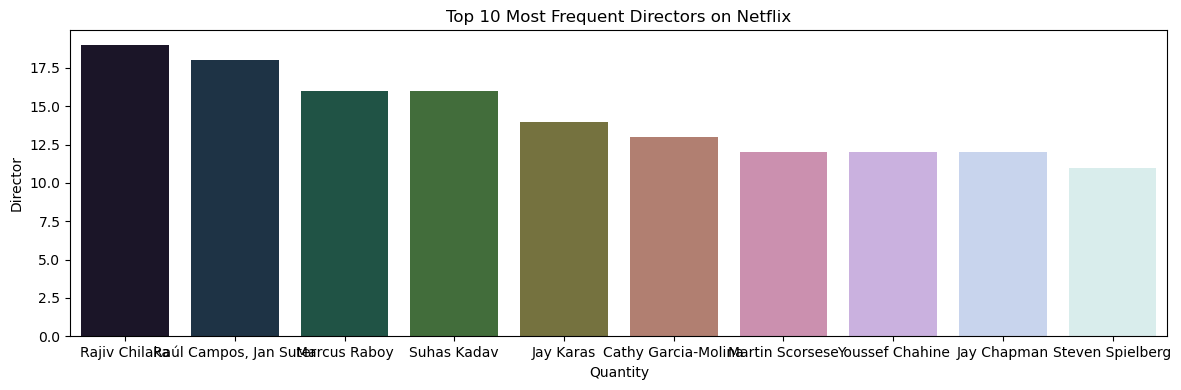

In [21]:
# Things to consider: null values, names may be duplicated, no multiple directors per cell
# Step 1: Remove null values from directors
direc = df["director"].dropna()

# Step 2: Remove extra spaces from names
direc = direc.str.strip()

# Step 3: Count frequency
dir10 = direc.value_counts().head(10)

# Step 4: Plot results
plt.figure(figsize=(12,4))
sns.barplot(
    x=dir10.index,
    y=dir10.values,
    hue=dir10.index,
    palette="cubehelix",
    legend=False
)
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Quantity")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


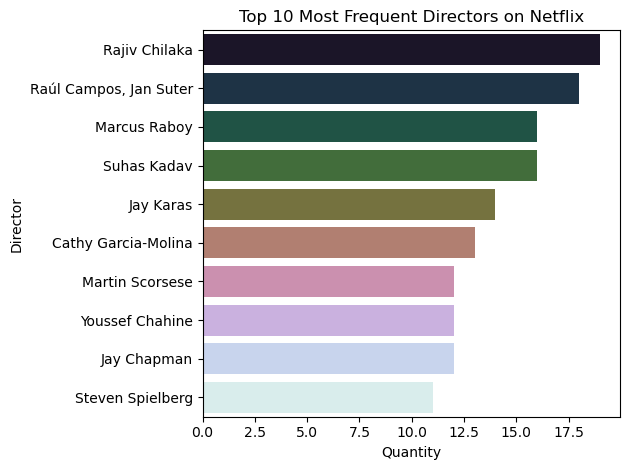

In [22]:
#Chatgpt
# plt.figure(figsize=(12, 4))  # <-- this should go before the plot

sns.barplot(
    x=dir10.values,
    y=dir10.index,
    hue=dir10.index,
    palette="cubehelix",
    legend=False
)

plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Quantity")
plt.ylabel("Director")
plt.tight_layout()
plt.show()


In [23]:
# See how many entries this Chilaka has
df[df["director"] == "Rajiv Chilaka"].shape[0]

# View all his records
df[df["director"] == "Rajiv Chilaka"][["title", "country"]]



,title,country
406,Chhota Bheem - Neeli Pahaadi,NaN
407,Chhota Bheem & Ganesh,NaN
408,Chhota Bheem & Krishna: Mayanagari,NaN
409,Chhota Bheem & Krishna: Pataliputra- City of t...,NaN
410,Chhota Bheem And The Broken Amulet,India
411,Chhota Bheem And The Crown of Valhalla,NaN
412,Chhota Bheem and the Incan Adventure,NaN
413,Chhota Bheem and The ShiNobi Secret,NaN
414,Chhota Bheem Aur Hanuman,NaN
415,Chhota Bheem aur Krishna,India


In [24]:
# View only the countries with cleaning applied (no NaN values)

df[df["director"] == "Rajiv Chilaka"]["country"].value_counts(dropna=False)


country
NaN      16
India     3
Name: count, dtype: int64

In [25]:
# 1. Filter by Rajiv Chilaka
chilaka_df = df[df["director"] == "Rajiv Chilaka"]

# 2. Remove null values in the 'country' column
chilaka_country = chilaka_df["country"].dropna()

# 3. Split by comma and explode
chilaka_country = chilaka_country.str.split(", ")
chilaka_country = chilaka_country.explode()

# 4. Count countries
chilaka_country.value_counts()


country
India    3
Name: count, dtype: int64

In [26]:
df["country"].head(10)

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

5. What is the average duration of movies vs. TV shows?

In [27]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


In [28]:
df.groupby("type")["duration"].sum()

type
Movie      90 min91 min125 min104 min127 min91 min67 min9...
TV Show    2 Seasons1 Season1 Season2 Seasons1 Season9 Se...
Name: duration, dtype: object

In [29]:
#Separate movies and TV shows
movie=df[df["type"] =="Movie"].copy()
serie=df[df["type"] =="TV Show"].copy()

In [30]:
# Extract numbers from 'duration', e.g., "90 min" to 90 or "2 seasons" to 2

movie["dur_min"]= movie["duration"].str.extract(r"(\d+)").astype(float)
serie["seasons"] = serie["duration"].str.extract(r"(\d+)").astype(float)

In [31]:
print(movie["dur_min"].mean())
print(serie["seasons"].mean())

99.57718668407311
1.764947683109118


In [32]:
# Plot in boxplot
# create new unified column for movie and series
# Movies: rename 'dur_min' to 'duration'
movie = movie[["type", "dur_min"]].rename(columns={"dur_min": "duration"})
# Series: rename 'seasons' to 'duration'
serie = serie[["type", "seasons"]].rename(columns={"seasons": "duration"})


In [33]:
df_duracion = pd.concat([movie, serie], axis=0)

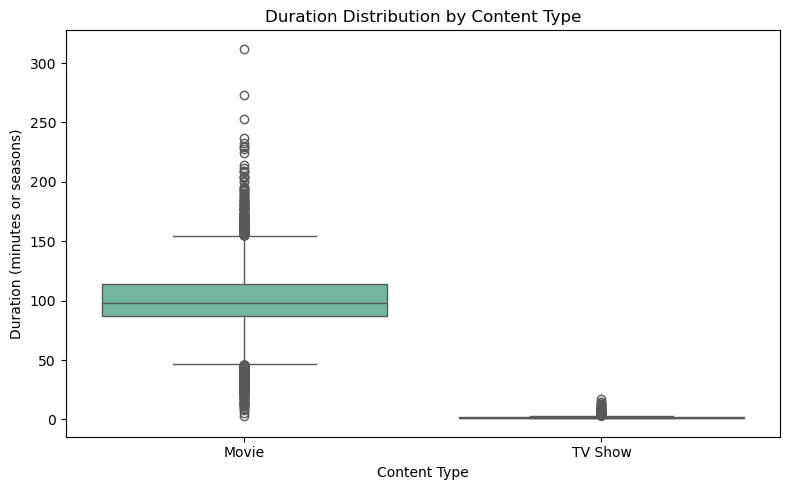

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_duracion,
    x="type",
    y="duration",
    hue="type",
    palette="Set2",
    legend=False
)
plt.title("Duration Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Duration (minutes or seasons)")
plt.tight_layout()
plt.show()


In [35]:
averages = (
    df_duracion
    .groupby("type")["duration"]
    .mean()
    .reset_index()
)


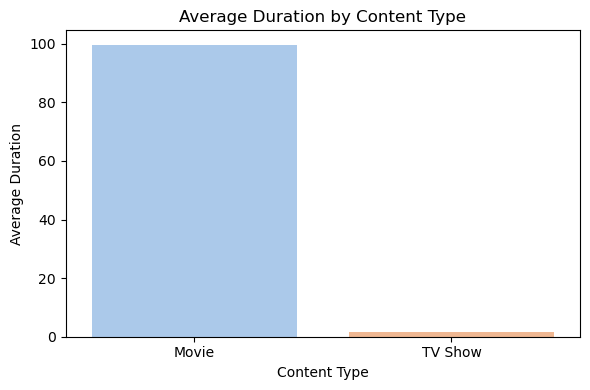

In [36]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=averages,
    x="type",
    y="duration",
    hue="type",
    palette="pastel",
    legend=False
)

plt.title("Average Duration by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Duration")
plt.tight_layout()
plt.show()


6. How does content vary by category (drama, comedy, etc.)?

In [37]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
dtype: int64

In [38]:
#1. Eliminate null values:
cat = df["listed_in"].dropna()

In [39]:
# 2. Split by comma and space:
cat = cat.str.split(", ")
cat

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

In [40]:
# 3. Convert to individual rows (explode()):
cat= cat.explode()
cat

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: listed_in, Length: 19323, dtype: object

In [41]:
#4. Count most comun categories:
cat10= cat.value_counts().head(10)

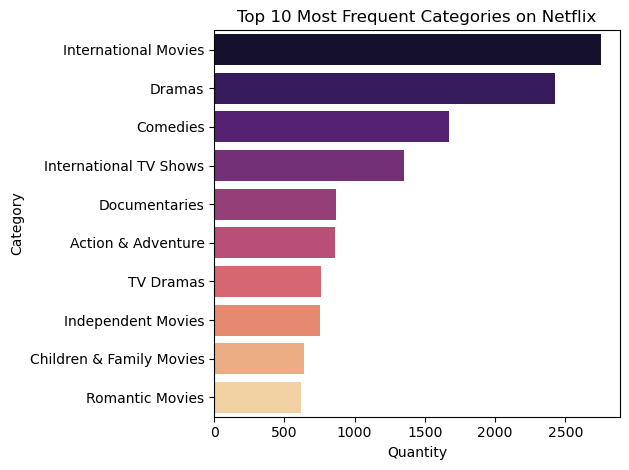

In [42]:
#Graph

sns.barplot(
    x=cat10.values,
    y=cat10.index,
    hue=cat10.index,
    palette="magma"
)
plt.title("Top 10 Most Frequent Categories on Netflix")
plt.xlabel("Quantity")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [43]:
#Check if the column has NaN values
df["listed_in"].isna().sum()

0

In [44]:
#Check if the colunm has empty values
(df["listed_in"].str.strip() == "").sum()

0

In [45]:
# Step 3: See how many times "null", "None" or "na" appear as text
df["listed_in"].str.lower().isin(["null", "none", "na"]).sum()

0

In [46]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


Bonus. Group the categories (listed_in) by content type (Movie vs TV Show) and plot them comparatively.

In [47]:
# Paso 1: Eliminate nulls and separate categories
df_cat = df[["type", "listed_in"]].dropna()

df_cat["listed_in"] = df_cat["listed_in"].str.split(", ")
df_cat = df_cat.explode("listed_in")
df_cat

,type,listed_in
0,Movie,Documentaries
1,TV Show,International TV Shows
1,TV Show,TV Dramas
1,TV Show,TV Mysteries
2,TV Show,Crime TV Shows
...,...,...
8805,Movie,Children & Family Movies
8805,Movie,Comedies
8806,Movie,Dramas
8806,Movie,International Movies


In [48]:
#Paso 2: Group.by type and category
cat_tipo = (
    df_cat
    .groupby(["listed_in", "type"])
    .size()
    .reset_index(name="conteo")
)
cat_tipo.head()

,listed_in,type,conteo
0,Action & Adventure,Movie,859
1,Anime Features,Movie,71
2,Anime Series,TV Show,176
3,British TV Shows,TV Show,253
4,Children & Family Movies,Movie,641


In [49]:
# Step 3: Filter the 10 most common categories globally (without type)
top_categories = (
    df_cat["listed_in"]
    .value_counts()
    .head(10)
    .index
)
# top_categories
cat_top10 = (
    cat_tipo[cat_tipo["listed_in"]
    .isin(top_categories)]
    .sort_values("conteo", ascending=False)
)
cat_top10


,listed_in,type,conteo
16,International Movies,Movie,2752
12,Dramas,Movie,2427
7,Comedies,Movie,1674
17,International TV Shows,TV Show,1351
10,Documentaries,Movie,869
0,Action & Adventure,Movie,859
34,TV Dramas,TV Show,763
15,Independent Movies,Movie,756
4,Children & Family Movies,Movie,641
24,Romantic Movies,Movie,616


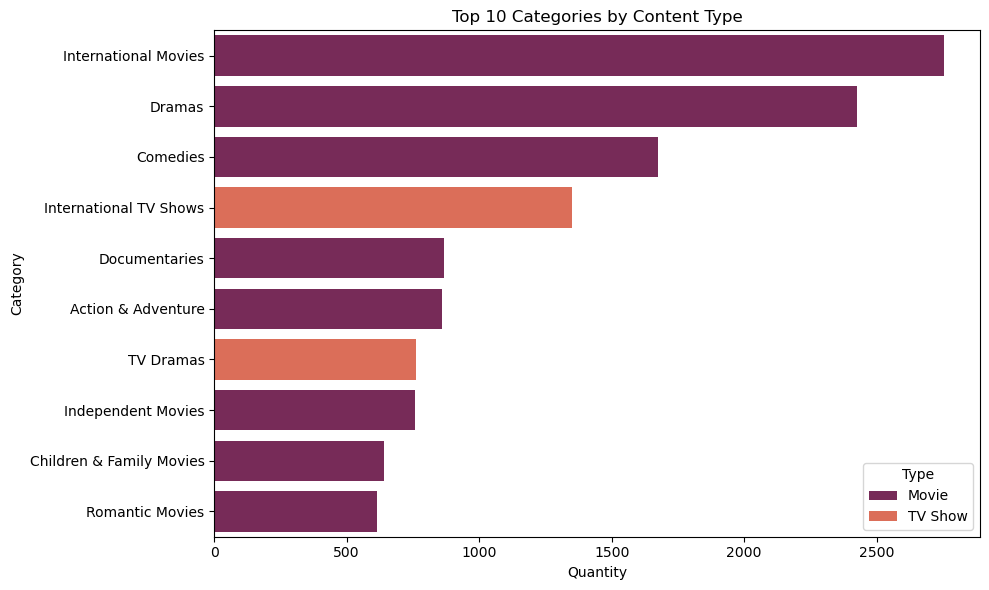

In [50]:
# Step 4: Plot with sns.barplot grouped by hue
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cat_top10,
    x="conteo",
    y="listed_in",
    hue="type",
    palette="rocket"
)
plt.title("Top 10 Categories by Content Type")
plt.xlabel("Quantity")
plt.ylabel("Category")
plt.legend(title="Type")
plt.tight_layout()
plt.show()


7. What content has the longest and shortest durations?

In [52]:
movie_min = movie.dropna(subset=["duration"]).sort_values("duration").head(1)
movie_max = movie.dropna(subset=["duration"]).sort_values("duration", ascending=False).head(1)

print("Movie mas corta")
print(movie_min)

print("\nMovie mas larga")
print(movie_max)


Movie mas corta
       type  duration
3777  Movie       3.0

Movie mas larga
       type  duration
4253  Movie     312.0


In [53]:
serie_min = serie.dropna(subset=["duration"]).sort_values("duration").head(1)
serie_max = serie.dropna(subset=["duration"]).sort_values("duration", ascending=False).head(1)

print("Serie más corta:")
print(serie_min)

print("\nSerie más larga:")
print(serie_max)


Serie más corta:
         type  duration
3695  TV Show       1.0

Serie más larga:
        type  duration
548  TV Show      17.0


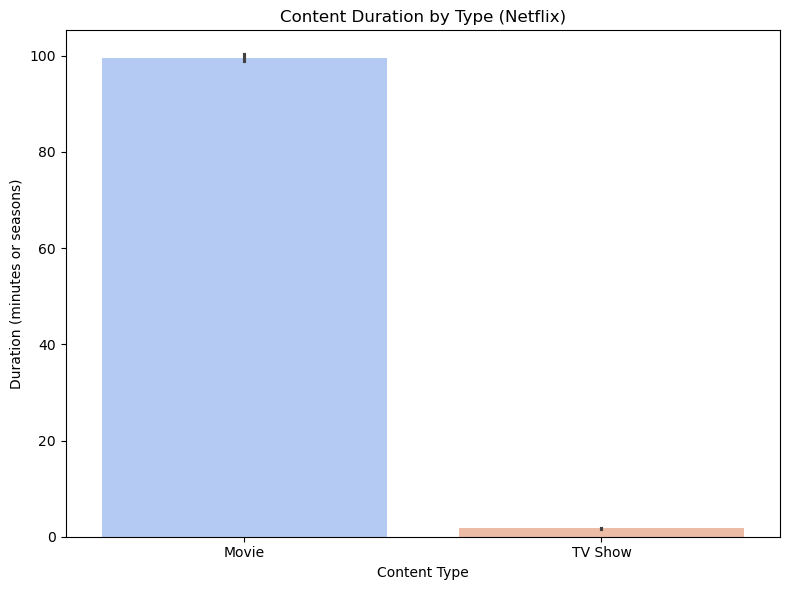

In [55]:
# Remove nulls
df_duracion_clean = df_duracion.dropna(subset=["duration"])

# Comparative boxplot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_duracion_clean,
    x="type",
    y="duration",
    hue="type",
    palette="coolwarm"
)

plt.title("Content Duration by Type (Netflix)")
plt.xlabel("Content Type")
plt.ylabel("Duration (minutes or seasons)")
plt.tight_layout()
plt.show()


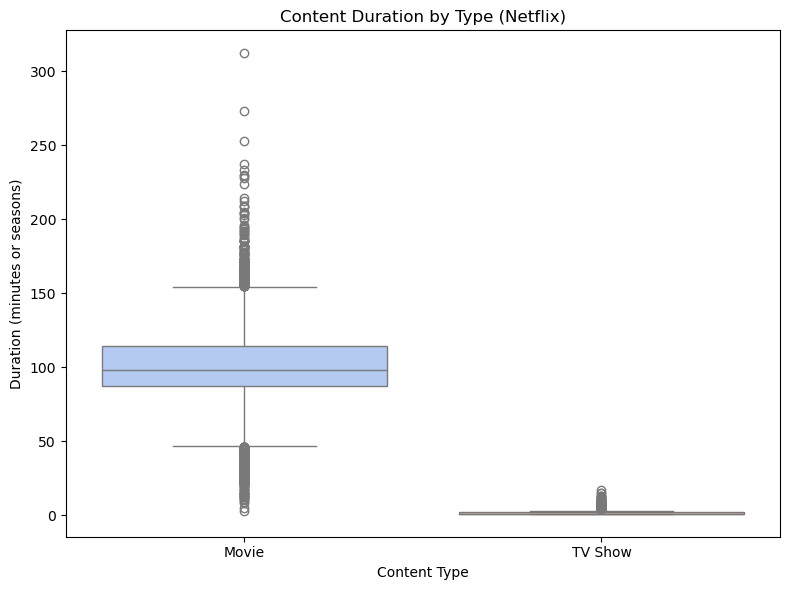

In [56]:
# Remove nulls
df_duracion_clean = df_duracion.dropna(subset=["duration"])

# Comparative boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_duracion_clean,
    x="type",
    y="duration",
    hue="type",
    palette="coolwarm"
)

plt.title("Content Duration by Type (Netflix)")
plt.xlabel("Content Type")
plt.ylabel("Duration (minutes or seasons)")
plt.tight_layout()
plt.show()


8.Which actors or actresses appear most frequently in the Netflix catalog?

In [57]:
#Eliminar valores nulos de la columna cast
df_cast = df.dropna(subset=["cast"])

In [58]:
#Separar los múltiples actores por título
df_cast["cast"] = df_cast["cast"].str.split(", ")
df_cast_exploded= df_cast.explode("cast") 

C:\Users\52818\AppData\Local\Temp\ipykernel_26180\1940842480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast["cast"] = df_cast["cast"].str.split(", ")


In [59]:
#Contar cuántas veces aparece cada actor o actriz
actores_mas_comunes = (
    df_cast_exploded["cast"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "actor", "cast": "conteo"})
)

actores_mas_comunes.head()


,conteo,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


In [60]:
actores_mas_comunes = (
    df_cast_exploded["cast"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"index": "actor", "count": "conteo"})
)
actores_mas_comunes.head()

,cast,conteo
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


In [61]:
actores_mas_comunes = (
    df_cast_exploded["cast"]
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={"cast": "conteo", "index": "actor"})
)
actores_mas_comunes.head()

,conteo,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


In [62]:
actores_mas_comunes = (
    df_cast_exploded["cast"]
    .value_counts()
    .head(10)
    .reset_index(name="conteo")  # aquí asignas el nombre de la segunda columna
    .rename(columns={"index": "actor"})
)
actores_mas_comunes.head()

,cast,conteo
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


In [63]:
actores_mas_comunes = (
    df_cast_exploded["cast"]
    .value_counts()
    .head(10)
    .reset_index(name="conteo")
    .rename(columns={"cast": "actor"})
)
actores_mas_comunes.head()

,actor,conteo
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32


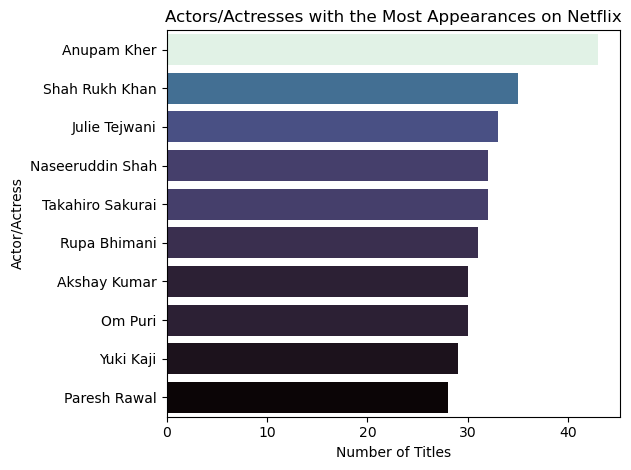

In [64]:
# Plot actors
# plt.figure(figsize=(10, 6))
sns.barplot(
    data=actores_mas_comunes,
    x="conteo",
    y="actor",
    hue="conteo",
    palette="mako",
    legend=False
)
plt.title("Actors/Actresses with the Most Appearances on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor/Actress")
plt.tight_layout()
plt.show()


9.  How much content is there by language? 

In [75]:
# Count content by country
content_by_country = (
    df["country"]
    .dropna()
    .str.split(",")                  # split multiple countries
    .explode()                       # separate into rows
    .str.strip()                     # remove spaces
    .value_counts()
    .reset_index(name="count")
    .rename(columns={"index": "country"})
)

In [77]:
top_10 = content_by_country.head(10)

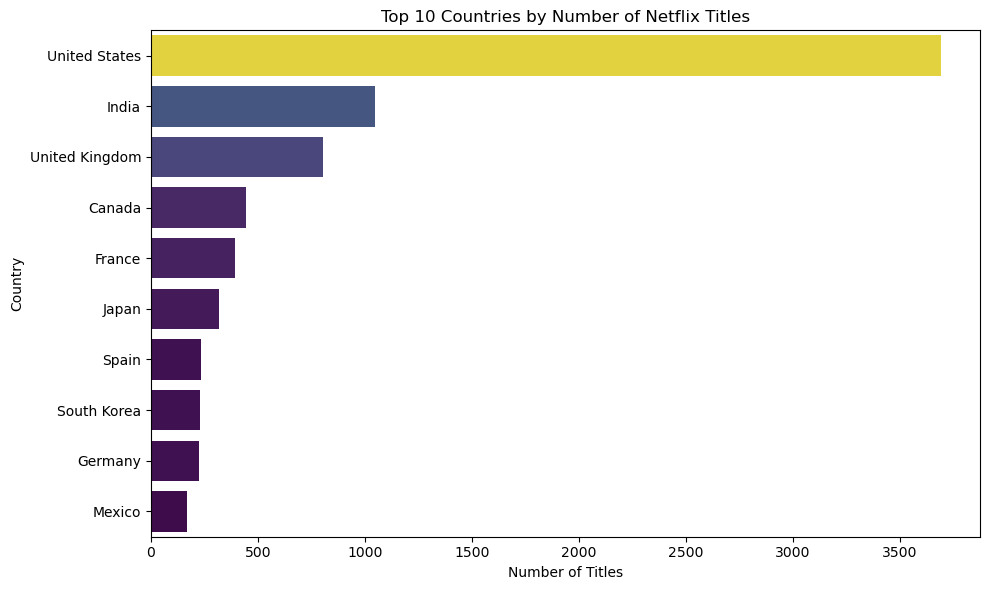

In [80]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    x="count",
    y="country",
    hue="count",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

10. What is the distribution of age ratings in the Netflix catalog?

In [70]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


In [71]:
# Clean and count ratings
clasificaciones = (
    df["rating"]
    .value_counts()
    .reset_index(name="conteo")
    .rename(columns={"index": "rating"})
)
clasificaciones


,rating,conteo
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


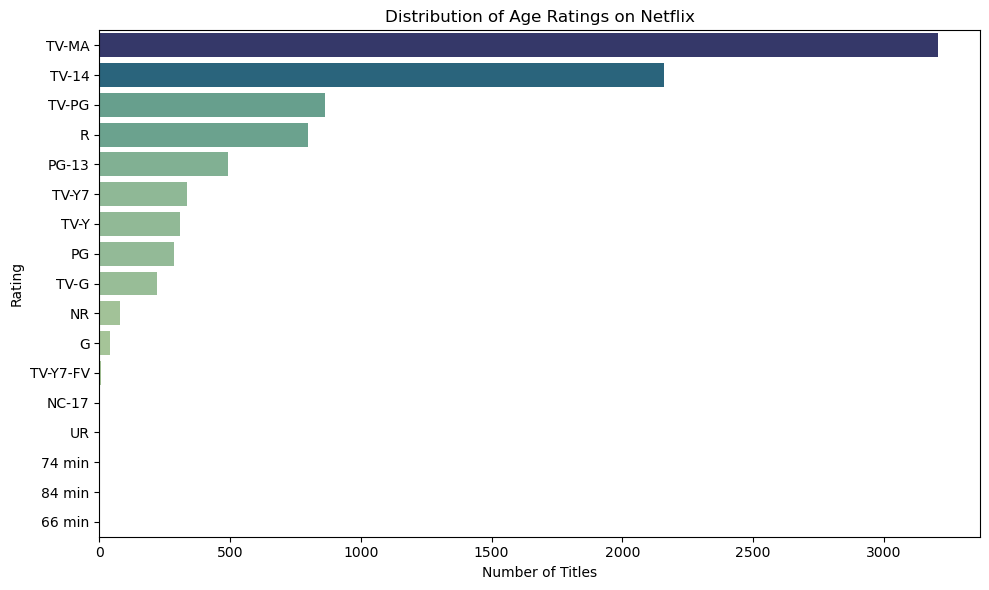

In [72]:
# Visualize Bar
plt.figure(figsize=(10, 6))
sns.barplot(
    data=clasificaciones,
    x="conteo",
    y="rating",
    hue="conteo",
    palette="crest",
    legend=False
)
plt.title("Distribution of Age Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


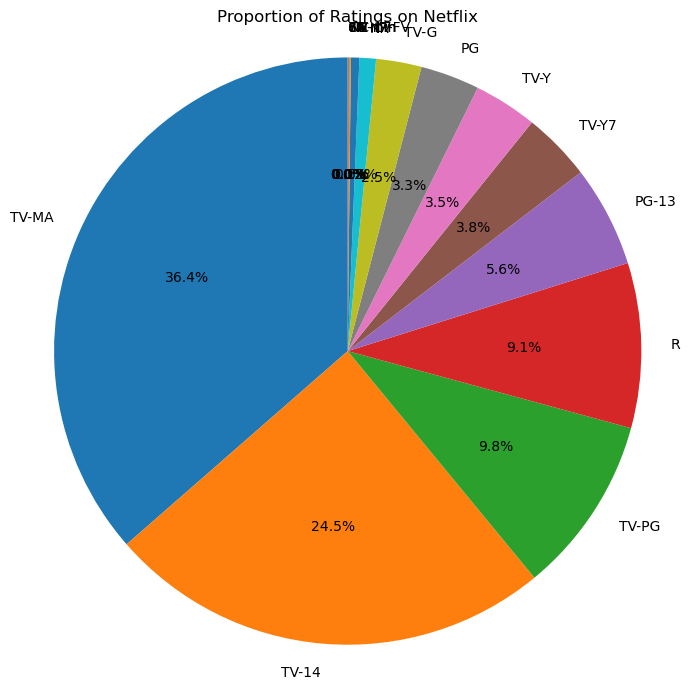

In [73]:
# Visualize pie
# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    clasificaciones["conteo"],
    labels=clasificaciones["rating"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Proportion of Ratings on Netflix")
plt.axis("equal")  # perfect circle
plt.tight_layout()
plt.show()


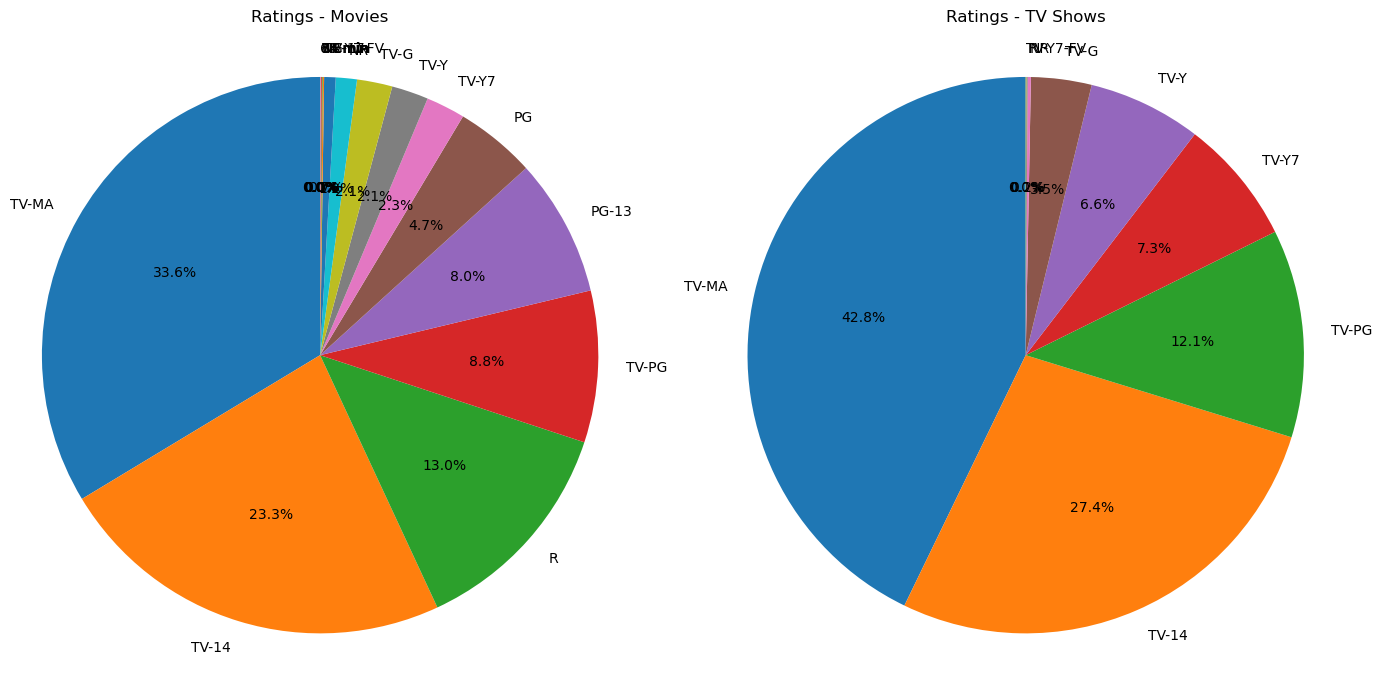

In [74]:
# Filter for movies and series separately
clasif_movie = (
    df[df["type"] == "Movie"]["rating"]
    .dropna()
    .value_counts()
    .reset_index(name="conteo")
    .rename(columns={"index": "rating"})
)

clasif_series = (
    df[df["type"] == "TV Show"]["rating"]
    .dropna()
    .value_counts()
    .reset_index(name="conteo")
    .rename(columns={"index": "rating"})
)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Movies
axes[0].pie(
    clasif_movie["conteo"],
    labels=clasif_movie["rating"],
    autopct="%.1f%%",
    startangle=90
)
axes[0].set_title("Ratings - Movies")
axes[0].axis("equal")

# Series
axes[1].pie(
    clasif_series["conteo"],
    labels=clasif_series["rating"],
    autopct="%.1f%%",
    startangle=90
)
axes[1].set_title("Ratings - TV Shows")
axes[1].axis("equal")

plt.tight_layout()
plt.show()



## Conclusions {#conclusions}

- **Finding 1:** The Netflix catalog is heavily dominated by content from the United States, with a notable presence from India, the United Kingdom, and other top-producing countries.  
- **Finding 2:** Movies significantly outnumber TV shows in the dataset, indicating a stronger focus on film content over series.  
- **Finding 3:** Certain actors and actresses appear frequently across multiple titles, suggesting strong partnerships or popularity within the Netflix catalog.  

**Next steps:** Explore genre distribution within top countries, analyze trends in content additions over time, and investigate how regional preferences impact Netflix’s acquisition strategy. 


## Credits {#credits}
**Data source:** Netflix Titles (Kaggle or equivalent source).  
**Tools:** Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook.  